In [2]:
# Import Package
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax7'
dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_human = MultiDefectDetectionDataset(data_dir=root, split='Stablehuman')
bbox_label_names = ('111', 'dot','100')
# DataSet Statistics
print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_human))
print('type of defects: ', bbox_label_names)

total number of training images:  1200
total number of test images:  3
type of defects:  ('111', 'dot', '100')


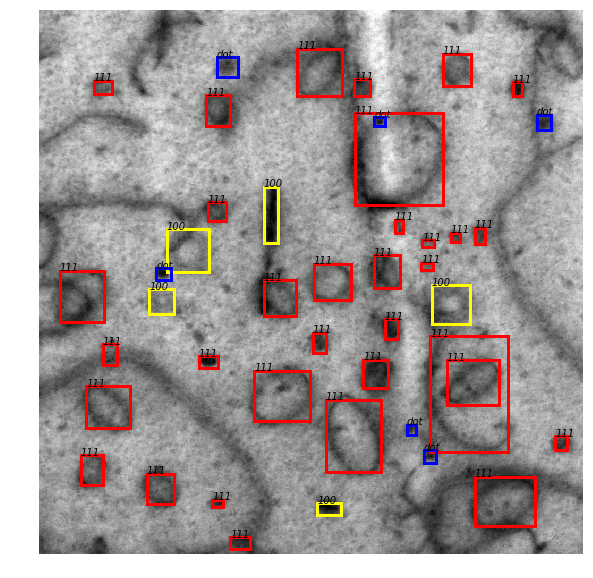

/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(62, 62)
center =  [ 29.05182667  28.69395942]
angle of rotation =  -0.783414112927
axes =  [ 28.41283927  30.3175698 ]
(105, 105)
center =  [ 52.37208432  55.28584761]
angle of rotation =  0.242511152722
axes =  [ 48.1009971   43.66184558]
(96, 96)
center =  [ 39.80434071  61.10788902]
angle of rotation =  0.714459454646
axes =  [ 48.56675842  29.43889585]
(140, 42)
center =  [ 74.28910088  22.77141677]
angle of rotation =  -0.0675400266109
axes =  [ 54.99025221  11.29712587]
(37, 61)


center =  [ 16.87735942  29.62389454]
angle of rotation =  -0.0296464581592
axes =  [ 22.94952345  29.4161515 ]


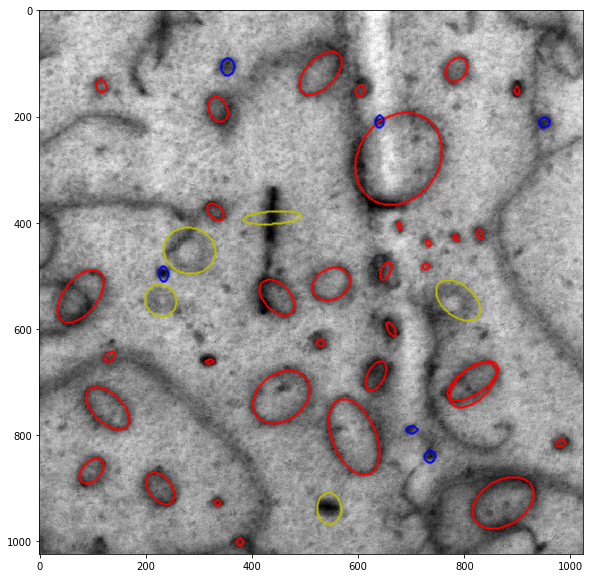

In [3]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, labels = dataset_human[2]
visualization.vis_bbox(img, bbox, labels, label_names=bbox_label_names, ax=ax1)
plt.show()
from utils.postProcessing import img_ellipse_fitting_3kinds
img_ellipse_fitting_3kinds(img,bbox,labels)

/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(34, 31)
center =  [ 15.69595681  16.27741239]
angle of rotation =  -0.372454870359
axes =  [ 10.40651987  12.68306754]
(36, 33)
center =  [ 18.33333752  15.49096125]
angle of rotation =  0.238404188556
axes =  [ 15.13114364  13.05110592]
(46, 45)
center =  [ 23.61503594  19.27725463]
angle of rotation =  -0.63337186381
axes =  [ 17.92584977  26.4151226 ]
(44, 40)
center =  [ 24.3489921   18.25945233]
angle of rotation =  0.570689767068
axes =  [ 16.16700192  18.46898524]
(38, 37)


center =  [ 21.06196885  18.39377018]
angle of rotation =  0.11120174016
axes =  [ 19.67257753  16.09639216]
(41, 41)
center =  [ 18.7172098   18.47914211]
angle of rotation =  0.752619975565
axes =  [ 16.9736166   15.79298728]
(73, 64)
center =  [ 36.60299384  31.45851276]
angle of rotation =  0.65547913245
axes =  [ 32.22200015  23.48101961]
(39, 35)
center =  [ 13.37239227  16.39348318]
angle of rotation =  -0.624695587693
axes =  [  7.55501806  17.86836065]
(35, 32)


center =  [ 17.32057223  15.13038999]
angle of rotation =  -0.146030087866
axes =  [ 13.90732935  12.07054012]
(42, 40)
center =  [ 18.67665652  20.52012105]
angle of rotation =  0.711574807811
axes =  [ 16.92752201   6.20101014]
(39, 39)


/Users/mingrenshen/PycharmProjects/multitype-defect-detection/utils/FitEllipse.py:38: RuntimeWarning: invalid value encountered in sqrt
  res2 = np.sqrt(up / down2)


center =  [ 27.89693745  23.42186422]
angle of rotation =  -0.301272629625
axes =  [ 0.95309696         nan]
Z
(71, 94)
center =  [ 31.45461954  45.56264888]
angle of rotation =  -0.00676741037357
axes =  [ 3.10966235         nan]
Z
(57, 55)
center =  [ 29.17216625  19.35108668]
angle of rotation =  0.249847449412
axes =  [ 6.271478       nan]
Z
(50, 48)


center =  [ 23.20491759  21.14252564]
angle of rotation =  -0.770516767141
axes =  [ 22.12066237   9.8620908 ]
(61, 60)


center =  [ 24.63242016  20.725907  ]
angle of rotation =  0.153383875341
axes =  [ 6.38109887         nan]
Z
(41, 53)
center =  [ 18.31248264  21.64864839]
angle of rotation =  0.294332011834
axes =  [ 21.16572376  27.52563881]
(50, 53)


center =  [ 20.41335253  25.33572531]
angle of rotation =  -0.70884999847
axes =  [  6.4560897   23.89727164]
(54, 53)
center =  [ 31.59351427  27.98663674]
angle of rotation =  0.756261459979
axes =  [ 24.54980873   4.93165674]
(65, 61)
center =  [ 32.37601672  25.53548566]
angle of rotation =  0.405813405745
axes =  [ 28.51998196  27.53313016]
(56, 58)


center =  [ 24.40002702  29.94283155]
angle of rotation =  0.711013696743
axes =  [ 21.96270805  20.97192589]
(41, 41)
center =  [ 20.4127466   18.36259706]
angle of rotation =  0.189761761563
axes =  [ 10.13692659  15.43581758]
(45, 44)


center =  [ 20.54213638  19.19491401]
angle of rotation =  -0.614858041305
axes =  [ 18.48615291  21.08006362]
(32, 32)


center =  [ 17.35187322  16.57193953]
angle of rotation =  -0.582201058964
axes =  [ 15.54578294  13.31430053]


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(38, 41)
center =  [ 17.09728009  20.544556  ]
angle of rotation =  -0.558276321343
axes =  [ 11.08351066  15.04892109]


(38, 41)
center =  [ 17.09728009  20.544556  ]
angle of rotation =  -0.558276321343
axes =  [ 11.08351066  15.04892109]


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(62, 62)
center =  [ 29.05182667  28.69395942]
angle of rotation =  -0.783414112927
axes =  [ 28.41283927  30.3175698 ]
(105, 105)
center =  [ 52.37208432  55.28584761]
angle of rotation =  0.242511152722
axes =  [ 48.1009971   43.66184558]
(96, 96)
center =  [ 39.80434071  61.10788902]
angle of rotation =  0.714459454646
axes =  [ 48.56675842  29.43889585]
(140, 42)
center =  [ 74.28910088  22.77141677]
angle of rotation =  -0.0675400266109
axes =  [ 54.99025221  11.29712587]
(37, 61)
center =  [ 16.87735942  29.62389454]
angle of rotation =  -0.0296464581592
axes =  [ 22.94952345  29.4161515 ]


[[(24, 36), (14, 19), (10, 23), (12, 16), (6, 14), (12, 16), (18, 33), (6, 13), (5, 11), (9, 24), (10, 20), (6, 11), (21, 29), (4, 7), (8, 17), (16, 32), (14, 19), (5, 6), (13, 20), (6, 9), (10, 23), (9, 13), (21, 33), (5, 8), (6, 8), (6, 8), (8, 14), (28, 34), (22, 25), (7, 16), (34, 49), (18, 33), (30, 51), (29, 75), (11, 16), (25, 33), (13, 19), (11, 15), (22, 25), (7, 16), (34, 49), (18, 33), (30, 51), (29, 75), (11, 16), (25, 33), (13, 19), (11, 15), (9, 11), (17, 24), (27, 49), (8, 10), (18, 24), (75, 91), (28, 37), (24, 39), (31, 57), (27, 49), (17, 27), (21, 33), (43, 58), (41, 75), (15, 29), (23, 54), (42, 62), (6, 8), (8, 17), (11, 18), (5, 8), (3, 6), (3, 5), (3, 6), (5, 6), (4, 7), (6, 14), (6, 6), (3, 5), (7, 11), (6, 7), (29, 53), (3, 7)], [(7, 7), (7, 9), (5, 5), (5, 7), (7, 7), (8, 8), (6, 6), (5, 5), (8, 8), (5, 5), (7, 7), (6, 8), (5, 5), (5, 5), (6, 6), (6, 8), (5, 5), (6, 6), (6, 9), (6, 8), (5, 7), (7, 7), (7, 7), (7, 7), (7, 7), (8, 8), (6, 6), (6, 8), (6, 6), (7,

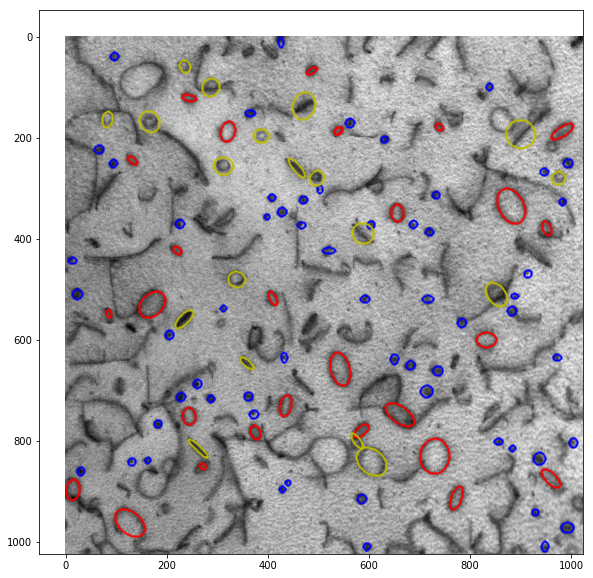

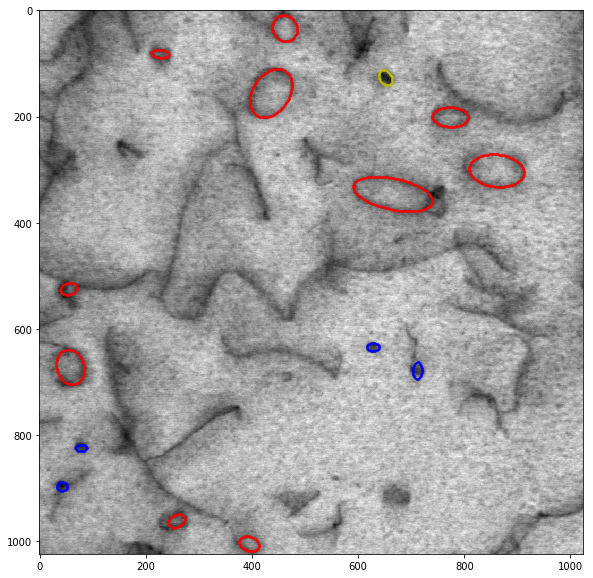

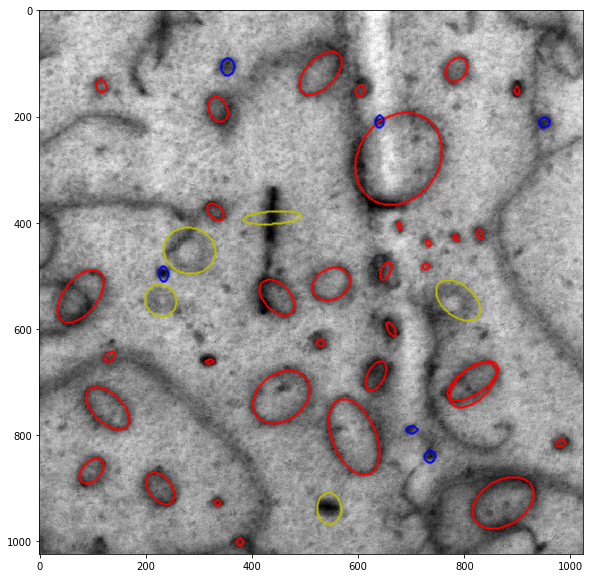

In [4]:
# Loop testing images to check the dsitribution of r_eff
List_0_111 = list()
List_1_blackdot = list()
List_2_100 = list()

Results = list()
Results.append(List_0_111)
Results.append(List_1_blackdot)
Results.append(List_2_100)

# import functions
from utils.postProcessing import img_ellipse_fitting_3kinds_stat
# img_ellipse_fitting_3kinds_stat(img,bbox,labels,Results)

for imgdata in dataset_human:
    #fig = plt.figure(figsize=(10,10))
    #ax1 = fig.add_subplot(1, 1, 1)
    img, bbox, labels = imgdata
    img_ellipse_fitting_3kinds_stat(img,bbox,labels,Results)
    #visualization.vis_bbox(img, bbox, labels, label_names=bbox_label_names, ax=ax1)
    #plt.show()

print(Results)

In [5]:
Reff111 = list()
Reff100 = list()

for item in Results[0]:
    Reff111.append(np.max(item)*2)
    
for item in Results[2]:
    Reff100.append(np.max(item)*2)

In [6]:
print('The average effective radius of 111 is %f'%(np.average(Reff111)))
print('The average effective radius of BlackDots is %f'%(np.average(Results[1])))
print('The average effective radius of 100 is %f'%(np.average(Reff100)))

The average effective radius of 111 is 51.679012
The average effective radius of BlackDots is 7.787671
The average effective radius of 100 is 47.615385


In [9]:
# Calculate SEM
print('The SEM radius of 111 is %f'%(np.std(Reff111)/np.sqrt(len(Reff111))))
print('The SEM radius of 100 is %f'%(np.std(Reff100)/np.sqrt(len(Reff100))))
print('The SEM radius of BlackDots is %f'%(np.std(Results[1])/np.sqrt(len(Results[1]))))

The SEM radius of 111 is 4.274310
The SEM radius of 100 is 4.307719
The SEM radius of BlackDots is 0.247414



The average effective radius of 111 is 20.127729



The average effective radius of BlackDots is 7.700002

The average effective radius of 100 is 19.087805


<Figure size 1080x432 with 0 Axes>

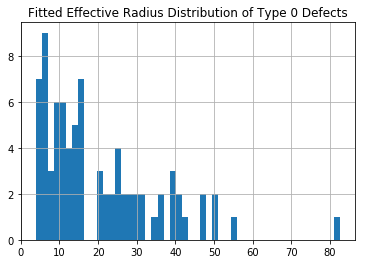

<Figure size 1080x432 with 0 Axes>

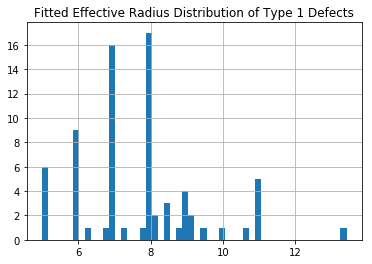

<Figure size 1080x432 with 0 Axes>

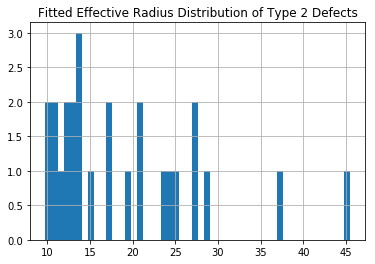

In [23]:
# Plot Size Distribution in each type
for typeInd in range(3):
    DF= pd.DataFrame(columns=['R_eff'])
    
    for (index,RaRb) in enumerate(Results[typeInd]):
        DF.loc[index] = [np.sqrt(RaRb[0] * RaRb[1] )]
    print()
    if typeInd == 0:
        print('The average effective radius of 111 is %f'%(np.average(DF['R_eff'])))
    elif typeInd == 1:
        print('The average effective radius of BlackDots is %f'%(np.average(DF['R_eff'])))
    else:
        print('The average effective radius of 100 is %f'%( np.average(DF['R_eff']) ))
    # Ploting    
    histgramFileName = "Fitted_Hist_Effective_Radius_of_" + str(typeInd)
    fig = plt.figure(figsize=(15,6))
    fig, ax = plt.subplots(1,1)
    DF.hist(bins=50, ax=ax)
    plt.title('Fitted Effective Radius Distribution of Type ' + str(typeInd) + ' Defects')
    fig.savefig(histgramFileName)